# TICKET #1: ANÁLISIS DE CALIDAD DE DATOS

---

## 🎯 Objetivos

1. Cargar dataset original de TelecomX (Alura)
2. Aplanar estructura JSON anidada
3. Detectar problemas de calidad (nulls, duplicados, tipos incorrectos)
4. Analizar distribución de la variable objetivo (Churn)
5. Eliminar registros sin etiqueta
6. Generar dataset limpio para siguiente fase

---

## 📥 Input
- `data/original/alura_telecomx_original.json`

## 📤 Output
- `data/processed/01_dataset_clean.csv`

---

## 1. Imports y Configuración

In [3]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Configuración de warnings
import warnings
warnings.filterwarnings('ignore')

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


## 2. Carga de Datos

In [4]:
# Ruta del dataset original
data_path = Path('../data/original/alura_telecomx_original.json')

# Cargar JSON
with open(data_path, 'r') as f:
    data = json.load(f)

print(f"✓ Dataset cargado: {len(data):,} registros")
print(f"\nEstructura del primer registro:")
print(json.dumps(data[0], indent=2))

✓ Dataset cargado: 7,267 registros

Estructura del primer registro:
{
  "customerID": "0002-ORFBO",
  "Churn": "No",
  "customer": {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "Yes",
    "tenure": 9
  },
  "phone": {
    "PhoneService": "Yes",
    "MultipleLines": "No"
  },
  "internet": {
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "Yes",
    "StreamingTV": "Yes",
    "StreamingMovies": "No"
  },
  "account": {
    "Contract": "One year",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Mailed check",
    "Charges": {
      "Monthly": 65.6,
      "Total": "593.3"
    }
  }
}


## 3. Aplanamiento de Estructura JSON

El dataset original tiene estructura anidada (customer, phone, internet, account).
Necesitamos convertirlo a formato tabular plano.

In [5]:
# Aplanar estructura JSON
rows = []

for record in data:
    flat_record = {
        # Identificación
        'CustomerID': record['customerID'],
        'Churn': record['Churn'],
        
        # Customer
        'Gender': record['customer']['gender'],
        'SeniorCitizen': record['customer']['SeniorCitizen'],
        'Partner': record['customer']['Partner'],
        'Dependents': record['customer']['Dependents'],
        'Tenure': record['customer']['tenure'],
        
        # Phone
        'PhoneService': record['phone']['PhoneService'],
        'MultipleLines': record['phone']['MultipleLines'],
        
        # Internet
        'InternetService': record['internet']['InternetService'],
        'OnlineSecurity': record['internet']['OnlineSecurity'],
        'OnlineBackup': record['internet']['OnlineBackup'],
        'DeviceProtection': record['internet']['DeviceProtection'],
        'TechSupport': record['internet']['TechSupport'],
        'StreamingTV': record['internet']['StreamingTV'],
        'StreamingMovies': record['internet']['StreamingMovies'],
        
        # Account
        'Contract': record['account']['Contract'],
        'PaperlessBilling': record['account']['PaperlessBilling'],
        'PaymentMethod': record['account']['PaymentMethod'],
        'ChargesMonthly': record['account']['Charges']['Monthly'],
        'ChargesTotal': record['account']['Charges']['Total'],
    }
    rows.append(flat_record)

df = pd.DataFrame(rows)

print(f"✓ DataFrame creado: {df.shape[0]:,} filas × {df.shape[1]} columnas")
print(f"\nPrimeras 5 filas:")
df.head()

✓ DataFrame creado: 7,267 filas × 21 columnas

Primeras 5 filas:


,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 4. Información General del Dataset

In [6]:
print("=" * 80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 80)

print(f"\n📊 Dimensiones:")
print(f"   Registros: {len(df):,}")
print(f"   Columnas: {len(df.columns)}")

print(f"\n📋 Tipos de datos:")
print(df.dtypes)

print(f"\n💾 Uso de memoria:")
print(df.memory_usage(deep=True).sum() / 1024**2, "MB")

INFORMACIÓN GENERAL DEL DATASET

📊 Dimensiones:
   Registros: 7,267
   Columnas: 21

📋 Tipos de datos:
CustomerID           object
Churn                object
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
ChargesMonthly      float64
ChargesTotal         object
dtype: object

💾 Uso de memoria:
7.038043022155762 MB


## 5. Análisis de Valores Nulos y Vacíos

In [7]:
print("=" * 80)
print("ANÁLISIS DE VALORES FALTANTES")
print("=" * 80)

# Crear reporte de valores faltantes
missing_report = pd.DataFrame({
    'Nulls': df.isnull().sum(),
    'Empty_Strings': (df == '').sum(),
    'Total_Missing': df.isnull().sum() + (df == '').sum(),
    'Percent': ((df.isnull().sum() + (df == '').sum()) / len(df) * 100).round(2)
})

missing_report = missing_report[missing_report['Total_Missing'] > 0].sort_values('Total_Missing', ascending=False)

if len(missing_report) > 0:
    print(f"\n⚠️ Columnas con valores faltantes:\n")
    print(missing_report)
else:
    print("\n✅ No hay valores nulos en el dataset")

ANÁLISIS DE VALORES FALTANTES

⚠️ Columnas con valores faltantes:

       Nulls  Empty_Strings  Total_Missing  Percent
Churn      0            224            224     3.08


## 6. Análisis de la Variable Objetivo (Churn)

In [8]:
print("=" * 80)
print("ANÁLISIS DE LA VARIABLE OBJETIVO: CHURN")
print("=" * 80)

# Distribución de Churn
churn_counts = df['Churn'].value_counts()

print(f"\n📊 Valores únicos: {df['Churn'].unique()}")
print(f"\n📈 Distribución:")

for value, count in churn_counts.items():
    pct = count / len(df) * 100
    bar = "█" * int(pct / 2)
    print(f"   '{value}': {count:5d} ({pct:5.2f}%) {bar}")

# Calcular churn rate (solo Yes/No)
churn_valid = df[df['Churn'].isin(['Yes', 'No'])]
churn_rate = (churn_valid['Churn'] == 'Yes').sum() / len(churn_valid) * 100

print(f"\n📈 Churn Rate (solo Yes/No): {churn_rate:.2f}%")

if churn_rate < 15:
    print(f"   ⚠️ Dataset desbalanceado (churn < 15%)")
elif churn_rate > 40:
    print(f"   ⚠️ Dataset desbalanceado (churn > 40%)")
else:
    print(f"   ✅ Dataset balanceado para clasificación")

ANÁLISIS DE LA VARIABLE OBJETIVO: CHURN

📊 Valores únicos: ['No' 'Yes' '']

📈 Distribución:
   'No':  5174 (71.20%) ███████████████████████████████████
   'Yes':  1869 (25.72%) ████████████
   '':   224 ( 3.08%) █

📈 Churn Rate (solo Yes/No): 26.54%
   ✅ Dataset balanceado para clasificación


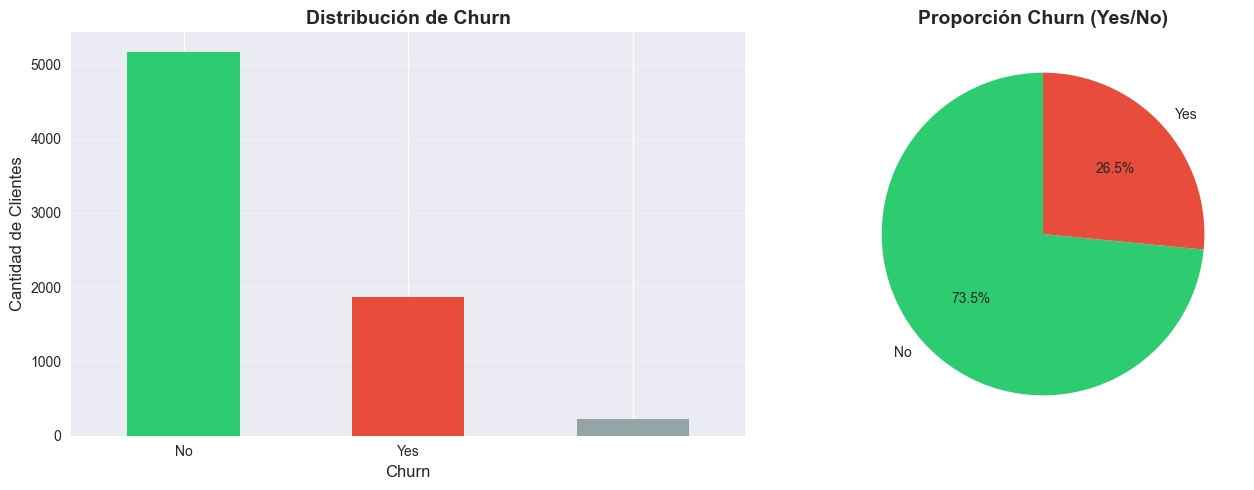

💾 Gráfico guardado: reports/figures/01_churn_distribution.png


In [9]:
# Visualización de Churn
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
churn_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c', '#95a5a6'])
axes[0].set_title('Distribución de Churn', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn', fontsize=12)
axes[0].set_ylabel('Cantidad de Clientes', fontsize=12)
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Gráfico de pastel (solo Yes/No)
churn_valid_counts = churn_valid['Churn'].value_counts()
axes[1].pie(churn_valid_counts, labels=churn_valid_counts.index, autopct='%1.1f%%',
            colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Proporción Churn (Yes/No)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/01_churn_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("💾 Gráfico guardado: reports/figures/01_churn_distribution.png")

## 7. Análisis de Variables Categóricas

In [10]:
# Seleccionar columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"=" * 80)
print(f"ANÁLISIS DE VARIABLES CATEGÓRICAS")
print(f"=" * 80)
print(f"\nTotal de columnas categóricas: {len(categorical_cols)}\n")

for col in categorical_cols[:10]:  # Mostrar primeras 10
    unique_count = df[col].nunique()
    print(f"\n{col} ({unique_count} valores únicos):")
    
    value_counts = df[col].value_counts().head(5)
    for val, count in value_counts.items():
        pct = count / len(df) * 100
        print(f"   {str(val):30s}: {count:5d} ({pct:5.2f}%)")

ANÁLISIS DE VARIABLES CATEGÓRICAS

Total de columnas categóricas: 18


CustomerID (7267 valores únicos):
   0002-ORFBO                    :     1 ( 0.01%)
   6614-VBEGU                    :     1 ( 0.01%)
   6637-KYRCV                    :     1 ( 0.01%)
   6635-MYYYZ                    :     1 ( 0.01%)
   6635-CPNUN                    :     1 ( 0.01%)

Churn (3 valores únicos):
   No                            :  5174 (71.20%)
   Yes                           :  1869 (25.72%)
                                 :   224 ( 3.08%)

Gender (2 valores únicos):
   Male                          :  3675 (50.57%)
   Female                        :  3592 (49.43%)

Partner (2 valores únicos):
   No                            :  3749 (51.59%)
   Yes                           :  3518 (48.41%)

Dependents (2 valores únicos):
   No                            :  5086 (69.99%)
   Yes                           :  2181 (30.01%)

PhoneService (2 valores únicos):
   Yes                           :  6560 (90.

## 8. Análisis de Variables Numéricas

In [11]:
# Seleccionar columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"=" * 80)
print(f"ANÁLISIS DE VARIABLES NUMÉRICAS")
print(f"=" * 80)
print(f"\nTotal de columnas numéricas: {len(numeric_cols)}\n")

if len(numeric_cols) > 0:
    print("Estadísticas descriptivas:\n")
    print(df[numeric_cols].describe().T)

ANÁLISIS DE VARIABLES NUMÉRICAS

Total de columnas numéricas: 3

Estadísticas descriptivas:

                 count       mean        std    min     25%   50%     75%  \
SeniorCitizen   7267.0   0.162653   0.369074   0.00   0.000   0.0   0.000   
Tenure          7267.0  32.346498  24.571773   0.00   9.000  29.0  55.000   
ChargesMonthly  7267.0  64.720098  30.129572  18.25  35.425  70.3  89.875   

                   max  
SeniorCitizen     1.00  
Tenure           72.00  
ChargesMonthly  118.75  


## 9. Detección de Problemas de Calidad

In [12]:
print("=" * 80)
print("PROBLEMAS DE CALIDAD DETECTADOS")
print("=" * 80)

problems = []

# 1. Churn vacíos
empty_churn = (df['Churn'] == '').sum()
if empty_churn > 0:
    problems.append(f"• {empty_churn} registros con Churn vacío (sin etiquetar)")

# 2. Duplicados
duplicates = df.duplicated(subset='CustomerID').sum()
if duplicates > 0:
    problems.append(f"• {duplicates} CustomerIDs duplicados")

# 3. ChargesTotal como string
if df['ChargesTotal'].dtype == 'object':
    problems.append(f"• 'ChargesTotal' es tipo string (debería ser numérico)")

# 4. Desbalance de clases
if 'churn_rate' in locals():
    if churn_rate < 15 or churn_rate > 40:
        problems.append(f"• Dataset desbalanceado: {churn_rate:.2f}% churn rate")

if len(problems) == 0:
    print("\n✅ No se detectaron problemas críticos de calidad")
else:
    print("\n⚠️ Problemas encontrados:\n")
    for p in problems:
        print(f"   {p}")

PROBLEMAS DE CALIDAD DETECTADOS

⚠️ Problemas encontrados:

   • 224 registros con Churn vacío (sin etiquetar)
   • 'ChargesTotal' es tipo string (debería ser numérico)


## 10. Limpieza de Datos

### Acciones de limpieza:
1. Eliminar registros con Churn vacío (no se pueden usar para entrenar)
2. Convertir ChargesTotal a numérico
3. Eliminar duplicados por CustomerID (si existen)

In [13]:
print("=" * 80)
print("PROCESO DE LIMPIEZA")
print("=" * 80)

df_clean = df.copy()

print(f"\nRegistros iniciales: {len(df_clean):,}")

# 1. Eliminar registros con Churn vacío
before = len(df_clean)
df_clean = df_clean[df_clean['Churn'].isin(['Yes', 'No'])].copy()
removed = before - len(df_clean)
print(f"\n1️⃣ Eliminar Churn vacío:")
print(f"   Removidos: {removed} registros")
print(f"   Restantes: {len(df_clean):,}")

# 2. Convertir ChargesTotal a numérico
print(f"\n2️⃣ Convertir ChargesTotal a numérico:")
before_type = df_clean['ChargesTotal'].dtype
df_clean['ChargesTotal'] = pd.to_numeric(df_clean['ChargesTotal'], errors='coerce')
print(f"   Tipo antes: {before_type}")
print(f"   Tipo después: {df_clean['ChargesTotal'].dtype}")

# 3. Eliminar duplicados por CustomerID
before = len(df_clean)
df_clean = df_clean.drop_duplicates(subset='CustomerID', keep='first')
removed = before - len(df_clean)
print(f"\n3️⃣ Eliminar duplicados:")
print(f"   Removidos: {removed} registros")
print(f"   Restantes: {len(df_clean):,}")

print(f"\n" + "=" * 80)
print(f"✅ DATASET LIMPIO: {len(df_clean):,} registros")
print(f"=" * 80)

PROCESO DE LIMPIEZA

Registros iniciales: 7,267

1️⃣ Eliminar Churn vacío:
   Removidos: 224 registros
   Restantes: 7,043

2️⃣ Convertir ChargesTotal a numérico:
   Tipo antes: object
   Tipo después: float64

3️⃣ Eliminar duplicados:
   Removidos: 0 registros
   Restantes: 7,043

✅ DATASET LIMPIO: 7,043 registros


## 11. Validación Final

In [14]:
print("VALIDACIÓN FINAL DEL DATASET LIMPIO")
print("=" * 80)

# Check nulls
nulls = df_clean.isnull().sum().sum()
print(f"\n✓ Valores nulos: {nulls}")

# Check Churn vacíos
empty_churn = (df_clean['Churn'] == '').sum()
print(f"✓ Churn vacíos: {empty_churn}")

# Check duplicados
duplicates = df_clean.duplicated(subset='CustomerID').sum()
print(f"✓ CustomerIDs duplicados: {duplicates}")

# Distribución final de Churn
print(f"\n📊 Distribución final de Churn:")
churn_final = df_clean['Churn'].value_counts()
for val, count in churn_final.items():
    pct = count / len(df_clean) * 100
    print(f"   {val}: {count:,} ({pct:.2f}%)")

churn_rate_final = (df_clean['Churn'] == 'Yes').sum() / len(df_clean) * 100
print(f"\n   Churn Rate: {churn_rate_final:.2f}%")

print(f"\n✅ Dataset validado y listo para siguiente fase")

VALIDACIÓN FINAL DEL DATASET LIMPIO

✓ Valores nulos: 11
✓ Churn vacíos: 0
✓ CustomerIDs duplicados: 0

📊 Distribución final de Churn:
   No: 5,174 (73.46%)
   Yes: 1,869 (26.54%)

   Churn Rate: 26.54%

✅ Dataset validado y listo para siguiente fase


## 12. Guardar Dataset Limpio

In [15]:
# Guardar dataset limpio
output_path = Path('../data/processed/01_dataset_clean.csv')
df_clean.to_csv(output_path, index=False)

print("=" * 80)
print("DATASET GUARDADO")
print("=" * 80)
print(f"\n✓ Ruta: {output_path}")
print(f"✓ Registros: {len(df_clean):,}")
print(f"✓ Columnas: {len(df_clean.columns)}")
print(f"✓ Tamaño: {output_path.stat().st_size / 1024:.2f} KB")

DATASET GUARDADO

✓ Ruta: ../data/processed/01_dataset_clean.csv
✓ Registros: 7,043
✓ Columnas: 21
✓ Tamaño: 949.10 KB


## 13. Resumen Final del Ticket

In [16]:
print("\n" + "=" * 80)
print("✅ TICKET #1 COMPLETADO")
print("=" * 80)

print(f"\n📊 Resumen de procesamiento:")
print(f"   • Registros iniciales: {len(df):,}")
print(f"   • Registros finales: {len(df_clean):,}")
print(f"   • Registros removidos: {len(df) - len(df_clean):,}")
print(f"   • Columnas: {len(df_clean.columns)}")

print(f"\n🎯 Variable objetivo (Churn):")
print(f"   • Churn Rate: {churn_rate_final:.2f}%")
print(f"   • No Churn: {(df_clean['Churn'] == 'No').sum():,} clientes")
print(f"   • Churn: {(df_clean['Churn'] == 'Yes').sum():,} clientes")

print(f"\n📁 Archivos generados:")
print(f"   • data/processed/01_dataset_clean.csv")
print(f"   • reports/figures/01_churn_distribution.png")

print(f"\n🎫 Próximo ticket:")
print(f"   • Ticket #2: Enriquecimiento de datos con geolocalización NYC")

print("\n" + "=" * 80)


✅ TICKET #1 COMPLETADO

📊 Resumen de procesamiento:
   • Registros iniciales: 7,267
   • Registros finales: 7,043
   • Registros removidos: 224
   • Columnas: 21

🎯 Variable objetivo (Churn):
   • Churn Rate: 26.54%
   • No Churn: 5,174 clientes
   • Churn: 1,869 clientes

📁 Archivos generados:
   • data/processed/01_dataset_clean.csv
   • reports/figures/01_churn_distribution.png

🎫 Próximo ticket:
   • Ticket #2: Enriquecimiento de datos con geolocalización NYC

